# SIT742: Modern Data Science 
**(Assessment Task 01: Wine Rating Data Exploration)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

**Student Information:** Please fill your information below

- Name: Dhananjay Madhukar Pandya
- Student ID: 218202943
- Email: dmpandya@deakin.edu.au

---

# Part 0. Data Files

## 0.1 Download Data  

In [0]:
!pip install wget  

In [0]:
import wget

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/wine.json'
DataSet = wget.download(link_to_data)

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/stopwords.txt'

DataSet = wget.download(link_to_data)

In [0]:
!ls

 elevations.json	    'stopwords (1).txt'    'wine (1).json'
 key_Shiraz.txt		    'stopwords (2).txt'    'wine (2).json'
 Melbourne_bike_share.csv   'stopwords (3).txt'    'wine (3).json'
 Melbourne_bike_share.json  'stopwords (4).txt'    'wine (4).json'
 reuters_1.txt		    'stopwords (5).txt'    'wine (5).json'
 reuters_2.txt		     stopwords_en.txt	    wine.json
 sample_data		     stopwords.txt
 statisticByState.csv	     top_common_words.txt


## 0.2 Load Data  

In [0]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
file = 'wine.json'

In [0]:
# write your code here

# Read the json file and drop rows with invalid values in the attributes of 
# 'points' and 'price'.
df = pd.read_json(file)
df = df.dropna(subset=['points','price'])

In [0]:
# View the first 5 rows of the dataframe
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,None,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


# Part 1: numeric anaysis

## 1.1 Explore the data distribution for each column.

Attribute: country


count     120916
unique        42
top           US
freq       54265
Name: country, dtype: object


Attribute: description


count                                                120975
unique                                               111567
top       Cigar box, café au lait, and dried tobacco aro...
freq                                                      3
Name: description, dtype: object


Attribute: designation


count       86196
unique      35776
top       Reserve
freq         1980
Name: designation, dtype: object


Attribute: points


count    120975.000000
mean         88.421881
std           3.044508
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64


Attribute: price


count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: pric

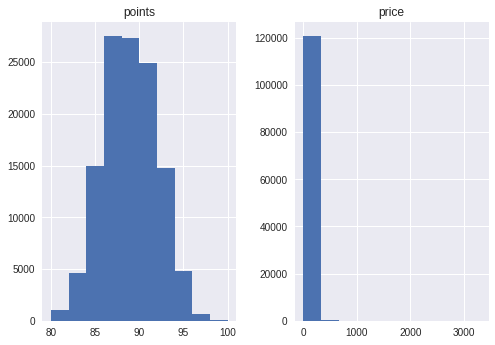

In [0]:
# write your code here
# you may use functions such as describe() on each attribute

# View summary descriptive measures for each column in the dataframe
for i in df.columns:
  print('Attribute: ' + i)
  print('\n')
  print(df[i].describe())
  print('\n')

# View histograms of numerical attributes in the dataframe
df.hist();

## 1.2 Find the 10 varieties of wine which receives the highest number of  reviews

In [0]:
# write your code here
# you may use functions such as value_counts()

# View top 10 largest value counts by wine varieties
df.variety.value_counts().nlargest(10)

Pinot Noir                  12787
Chardonnay                  11080
Cabernet Sauvignon           9386
Red Blend                    8476
Bordeaux-style Red Blend     5340
Riesling                     4972
Sauvignon Blanc              4783
Syrah                        4086
Rosé                         3262
Merlot                       3062
Name: variety, dtype: int64

## 1.3 Find varieties of wine having the average price less than 20, with the average pointsat least 90

In [0]:
# write your code here
# you may use functions such as groupby() 

# Group the dataset by wine variety and find any varieties with average
# price less than 20 and average points greater than or equal to 90
df.groupby('variety').mean()[(df.groupby('variety').mean().price < 20) & 
                             (df.groupby('variety').mean().points >= 90)
                            ]

,points,price
variety,,
Blauburgunder,93.0,19.000000
Caprettone,92.0,19.000000
Kotsifali,92.0,13.000000
Ondenc,90.0,15.000000
Roussanne-Grenache Blanc,91.0,16.000000
Shiraz-Malbec,90.0,18.666667
Tinta Cao,90.0,14.000000


## 1.4 Build statistic table 

In [0]:
# write your code here
# you may use functions such as groupby() and round(decimals=2)

# Loop through the dataframe and build a statistic table containing
# country name, list of most occuring varieties, average taster rating,
# and average price
for idx,val in enumerate(df.country.unique()):
    # If country name is not null, find how many times the highest
    # wine variety from that country occurs in the dataset based on
    # the country name.
    # 
    # Otherwise, find how many times the highest wine variety from
    # unknown countries occurs in the dataset.
    if pd.isna(val)==False:
        highest_value = df[df.country==val].variety.value_counts(
                        ).nlargest(1)[0]
    else:
        highest_value = df[pd.isna(df.country)].variety.value_counts(
                        ).nlargest(1)[0]
    
    # If index = 0 (first country in the dataset), then start creating
    # a dataframe containing the country name and the most frequently
    # occuring variety name. 
    # 
    # Otherwise, add to the already created dataframe, the country names and
    # most occuring wine variety names.
    # 
    # The most occuring variety (see previous code block) count helps find 
    # instances where there are more than one varieties with the highest count.
    if idx==0:
        subset_df = df[df.country==val].variety.value_counts().reset_index()
        subset_df['country'] = val
        subset_df = subset_df.loc[subset_df.variety==highest_value,['country',
                                                                    'index']]
    else:
        new_subset_df = df[
                           df.country==val
                          ].variety.value_counts().reset_index()
        new_subset_df['country'] = val
        new_subset_df = new_subset_df.loc[new_subset_df.variety==
                                          highest_value,['country','index']]
        subset_df = pd.concat([subset_df,new_subset_df])

# Countries are grouped together such that countries with multiple top varieties
# appear in the same column as a list of varieties
subset_df = subset_df.groupby('country')['index'].apply(list).reset_index()
avg_points = [round(df[df.country==i].points.mean(),2) 
              for i in subset_df.country]
subset_df['AvgPoint'] = avg_points
avg_price = [round(df[df.country==i].price.mean(),2) for i in subset_df.country]
subset_df['AvgPrice'] = avg_price

# Change the column names to match the requested output
subset_df.columns = ['Country','Variety','AvgPoint','AvgPrice']

In [0]:
# save your table to 'statisticByState.csv'
subset_df.to_csv('statisticByState.csv',index=False)

### Recommendation

Hotel Tuplip should source wines from Ukraine, Bosnia and Herzegovina and India

### Justification

Dr Bear Guts wants to source the best tasting wine at the most afforable price. Wines from these three countries have the top 3 points-to-price ratios (9.13, 6.92, and 6.77 respectively).

# Part 2. Text Analysis

## 2.1 extract high requency words in description

In [0]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import *
from itertools import chain
#from tqdm import tqdm
import codecs

In [0]:
# Open the stopwords.txt file and store the data as a list
with open('stopwords.txt') as f:
    stop_words = f.read().splitlines()

# Remove any duplicate stop words from the list
stop_words = set(stop_words)

In [0]:
# write your code here
# define your tokenize

# Set up a tokenizer which can be used to create word tokens from strings
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")

def remove_stop_words(list_of_words):
    # Remove any stop words from the list that is inserted into the function.
    # 
    # The output is a reduced list of words
    reduced_list_of_words = [x for x in list_of_words if x not in stop_words]
    return reduced_list_of_words

# Convert to lowercase, tokenize and remove stopwords from the wine description
df.loc[:,'description'] = df.description.str.lower().apply(lambda x: 
                                                           remove_stop_words(
                                                               tokenizer
                                                               .tokenize(x)
                                                           )
                                                          )

In [0]:
# find top common words with document frequencies > 5000
# you may use function FreqDist() and sort()

# Initiate an empty list to store the top common words
top_common_words = []

# Create dictionary containing dataframe index as the key and the tokens for
# each document as the values
tokenized_descriptions = pd.Series(
                                   df.description.values,index=df.index
                                  ).to_dict()

# Extract only the unique keywords occuring in each document and add them to a
# list of words
# 
# Convert the list of words to frequencies. Since each word occurs only once
# in each document, hence the term frequencies are now the document frequencies
words = list(chain.from_iterable([set(value) 
                                  for value 
                                  in tokenized_descriptions.values()
                                 ]
                                )
            )
freq_dist = FreqDist(words)

# Loop through the frequently occuring words and their frequencies to find
# only words that occur in more than 5000 documents and add them to empty
# list of top common words
for word,frequency in freq_dist.items():
  if frequency > 5000:
    top_common_words.append(word)

# Sort the list of top common words alphabetically
top_common_words = sorted(top_common_words)

In [0]:
# save your table to 'top_common_words.txt'

# Open a new text file called top_common_words.txt and write the list of 
# top common words to this text file
#
# Each word appears on a new line
with open('top_common_words.txt', 'w') as f:
    for item in top_common_words:
        f.write("%s\n" % item)

## 2.2 Find key words for describing Shiraz using TF-IDF

In [0]:
# select 'description' from 'variety' equal to  'Shiraz'
shiraz_description = df.loc[df.variety=='Shiraz','description']

In [0]:
# use TfidfVectorizer to calculate TF-IDF score
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the shiraz descriptions into a single list for TF-IDF analysis
shiraz_description=[" ".join(desc) for desc in shiraz_description.values]

# Initialize the TF-IDF Vectorizer providing the argument analyzer so that
# the Vectorizer uses words as the feature, and the argument stop_words is 
# specified to ensure that no stop words remain in the Shiraz descriptions.
# 
# The vectorizer is then used to fit and transform the Shiraz descriptions
# into term-document matrix
tfidf = TfidfVectorizer(analyzer='word', stop_words = 'english')
scores = tfidf.fit_transform(shiraz_description)

In [0]:
# find words with TF-IDF score >0.4 and sort them

# Create a dense matrix from sparse matrix
scores_df = pd.DataFrame(scores.todense(),columns=tfidf.get_feature_names())

# Initialize an empty list to store the key Shiraz words
shiraz_keywords = []

# Loop through each word (represented by each column) and add any words with
# TF-IDF score greater than 0.4 to the list of key Shiraz words
for i in scores_df.columns:
    if (scores_df[i] > 0.4).any():
        shiraz_keywords.append(i)

# Sort the list of key Shiraz words alphabetically
shiraz_keywords = sorted(shiraz_keywords)

In [0]:
# save your table to 'key_Shiraz.txt'

# Open a new text file called key_Shiraz.txt and write the list of 
# Shiraz words that have TF-IDF score greater than 0.4 to this text file
#
# Each word appears on a new line
with open('key_Shiraz.txt', 'w') as f:
    for item in shiraz_keywords:
        f.write("%s\n" % item)